In [121]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
df = pd.read_csv("car_data.csv")

In [123]:
len(df)

11914

In [124]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [125]:
# cleaning up the dataset
df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)

for column in string_columns:
    df[column] = df[column].str.lower().str.replace(" ", "_")

using the str attribute, we can apply string operations to the entire column at the same time without using any for loops

In [126]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<Axes: xlabel='msrp', ylabel='Count'>

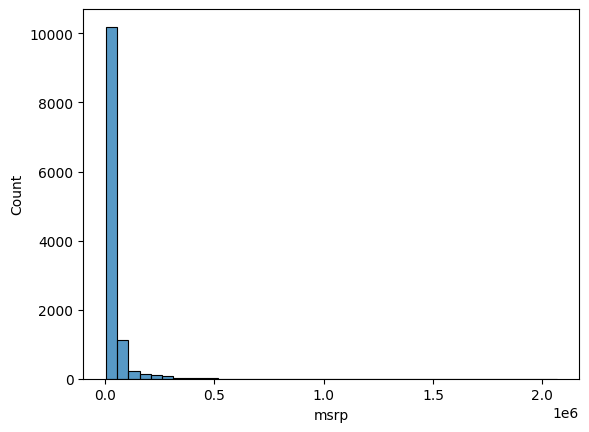

In [127]:
sns.histplot(df.msrp, bins=40)

<Axes: xlabel='msrp', ylabel='Count'>

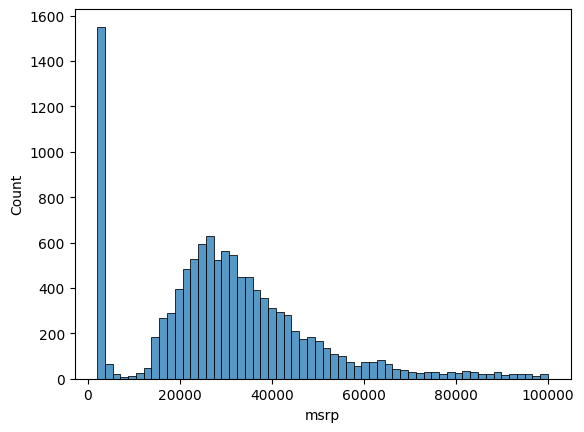

In [128]:
sns.histplot(df.msrp[df.msrp < 100000])

<Axes: xlabel='msrp', ylabel='Count'>

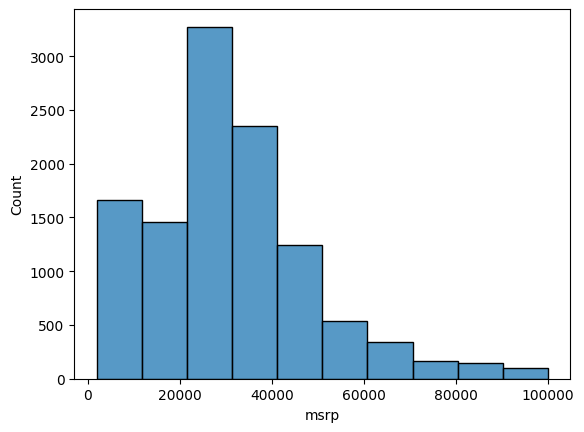

In [129]:
sns.histplot(df.msrp[df.msrp < 100000], bins=10)

In [130]:
log_price = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

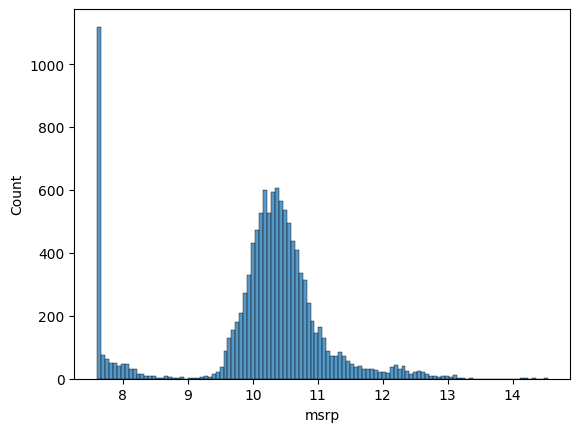

In [131]:
sns.histplot(log_price)

In [132]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [133]:
n = len(df)

n_val = int(.2 * n)
n_test = int(.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
# print(idx[:10])
np.random.shuffle(idx)
# print(idx[:10])
# print(df.iloc[idx[:2]])
# iloc stands for integer location
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()  # the first n_train values
df_val = df_shuffled.iloc[n_train: n_train + n_val].copy()  # the values frosm the one after n_train ends, and the one before n_test begins
df_test = df_shuffled.iloc[n_train + n_val:].copy()  # the last n_train values of the dataframe

In [134]:
idx = np.arange(5)
print('before shuffle', idx)
np.random.shuffle(idx)
print('after shuffle', idx)

before shuffle [0 1 2 3 4]
after shuffle [1 2 0 4 3]


In [135]:
# to make sure that every time we run it, the results are the same, we can fix the random seed:
np.random.seed(2)
idx = np.arange(5)
print('before shuffle', idx)
np.random.shuffle(idx)
print('after shuffle', idx)

# this is good for reproducibility
# this makes the results reproducible on the same computer.
# With a different os and a different version of NumPy, the result may be different.

before shuffle [0 1 2 3 4]
after shuffle [2 4 1 3 0]


In [136]:
# our initial analysis showed a long tail in the distribution of prices,
# and to remove its effect, we need to apply the log transfoamtion.
# we can do that below:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

to avoid accidentally using the target variable later, let's remove it from the dataframes:

In [137]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

removing the target variable is an optional step, but it's helpful to make sure that we don't use it when training a model: if that happens, we'd use price for predicting the price, and our model would have perfect accuracy

In [138]:
def g(xi):
    # xi is a list with n elements
    # do something with xi
    # return the result
    pass

In [139]:
xi = [453, 11, 86]

In [140]:
y_prod = g(xi)

In [141]:
w0 = 7.17
#   [w1    w2    w3   ]
w = [0.01, 0.04, 0.002]
n = 3
 
def linear_regression(xi):
    answer = w0
    for j in range(n):
        answer = answer + xi[j] * w[j]
    return answer

The translation of the formula for dot product to the code is straightforward:

In [142]:
def dot(xi, w):
    n = len(w)
    answer = 0.0
    for j in range(n):
        answer += xi[j] * w[j]
    return answer

In [143]:
def linear_regression(xi):
    return w0 + dot(xi, w)

alternatively, if xi and w are NumPy arrays, we cana use the built-in dot method for multiplication:

In [144]:
def linear_regression(xi):
    return w0 + xi.dot(w)

In [145]:
w = [w0] + w

In [146]:
xi = [1] + xi

In [147]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w = [w0] + w

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w)

In [148]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

In [149]:
X = [x1, x2, x10]

In [150]:
X = [[1, 148, 24, 1385],
     [1, 132, 25, 2031],
     [1, 453, 11, 86]]

In [151]:
predictions = []
 
for xi in X:
    pred = dot(xi, w)
    predictions.append(pred)

In [152]:
predictions = np.array(X).dot(w)

In [153]:
predictions

array([12.38 , 13.552, 12.312])

In [154]:
# print(X.dot(w))
print(X)
print(w)
print(dot([4, 3], [5, 2]))
print(np.dot([4, 3], [5, 2]))
print(X)
print(np.array(X))
print(X == np.array(X))
print(np.array(X).dot(w))

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]
[7.17, 0.01, 0.04, 0.002]
26.0
26
[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]
[[   1  148   24 1385]
 [   1  132   25 2031]
 [   1  453   11   86]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[12.38  13.552 12.312]


In [204]:
def train_linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0])
    print(ones)
    X = np.column_stack([ones, X])

    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [156]:
y_pred = w[0] + np.array(X).dot(w)

In [157]:
y_pred

array([19.55 , 20.722, 19.482])

## 2.4 Predicting the price

### 2.4.1. Baseline solution

In [158]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
df_num = df_train[base]

The simplest approach to fill in missing values with some other value is to fill in the missing values with zeroes

In [215]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    print(df_num)
    X = df_num.values
    print(X)
    return X

An alternative option is to replace the missing values with the average values. For some variables, for example, the number of cylinders, the value of zero doesn’t make much sense: a car cannot have zero cylinders. However, this will make our code more complex and won’t have a significant impact on the results. That’s why we follow a simpler approach and replace the missing values with zeros.

In [217]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

       engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
2735       148.0               4.0           33        24        1385
6720       132.0               4.0           32        25        2031
5878       148.0               4.0           37        28         640
11190       90.0               4.0           18        16         873
4554       385.0               8.0           21        15        5657
...          ...               ...          ...       ...         ...
434        300.0               6.0           31        20        3916
1902       210.0               4.0           30        24         873
9334       285.0               6.0           22        17         549
5284       563.0              12.0           21        13          86
2420       200.0               4.0           31        22         873

[7150 rows x 5 columns]
[[ 148.    4.   33.   24. 1385.]
 [ 132.    4.   32.   25. 2031.]
 [ 148.    4.   37.   28.  640.]
 ...
 [ 285.    6.   22.   17.  549.

In [218]:
y_pred = w_0 + X_train.dot(w)

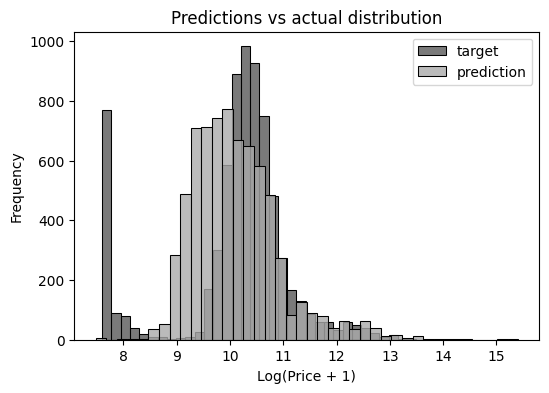

In [219]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [220]:
def rmse(y, y_pred):
    error = y_pred - y
    print(error)
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [221]:
rmse(y_train, y_pred)

[-0.02781925 -0.50032323 -0.22125759 ... -0.14957294 -0.64458959
 -0.54198867]


np.float64(0.7554192603920132)

### 2.4.3. Validating the model

In [222]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

       engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
2779       200.0               4.0           25        19        1385
3708       241.0               4.0           29        22         617
4794       160.0               4.0           36        26        5657
10498      290.0               6.0           34        21         204
1880       170.0               4.0           34        25         873
...          ...               ...          ...       ...         ...
11123      240.0               4.0           37        25         870
5549       444.0               8.0           20        13         238
4146       332.0               8.0           23        20        1624
6337       148.0               4.0           34        24         436
9814       290.0               6.0           25        18        1720

[2382 rows x 5 columns]
[[2.000e+02 4.000e+00 2.500e+01 1.900e+01 1.385e+03]
 [2.410e+02 4.000e+00 2.900e+01 2.200e+01 6.170e+02]
 [1.600e+02 4.000e+00 3.600e+

In [223]:
rmse(y_val, y_pred)

[-0.33648085 -0.53858672 -0.02902328 ... -0.72589812 -0.20451328
  0.20776517]


np.float64(0.7616530991301601)

In [224]:
print("validation:", rmse(y_val, y_pred))

[-0.33648085 -0.53858672 -0.02902328 ... -0.72589812 -0.20451328
  0.20776517]
validation: 0.7616530991301601


You can verify the max age by getting the max year from the dataset:

In [225]:
df_train["age"] = df_train.year.max() - df_train.year

In [226]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df["age"] = df.year.max() - df.year
    features.append("age")
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [227]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print("train", rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("validation", rmse(y_val, y_pred))

[1. 1. 1. ... 1. 1. 1.]
[-0.1509318  -0.16932805  0.34622871 ...  0.28987786 -0.47984221
 -0.06839532]
train 0.5175055465840046
[ 0.04455914 -0.2603009   0.3925894  ... -0.35394551  0.43738144
  0.51798408]
validation 0.5172055461058309


The validation error is ~0.517, which is a good improvement from ~0.76 (the value we had in the baseline solution). We conclude that adding "age" is indeed helpful when making predictions.

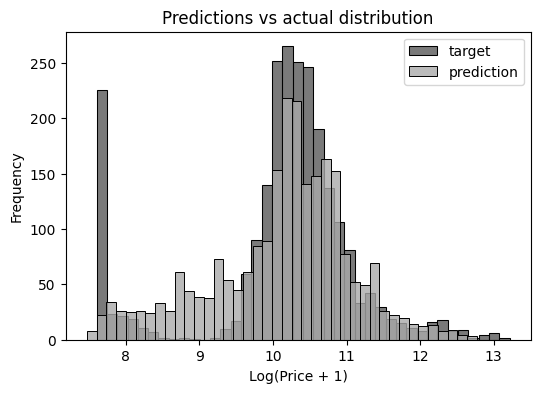

In [228]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

With the figure above, we can see that the distribution of the predictions follows the target distribution a lot more closely than before, and the validation RMSE score confirms it.

In [229]:
df['make'].value_counts().head(5)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [230]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df["age"] = df.year.max() - df.year
    features.append("age")

    for v in [2, 3, 4]:
        feature = "num_doors_%s" % v
        value = (df["number_of_doors"] == v).astype(int)
        df[feature] = value
        features.append(feature)
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [231]:
df["make"].value_counts().head(5)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [232]:
df["make"].value_counts().head(5).index.tolist()

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [233]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df["age"] = df.year.max() - df.year
    features.append("age")

    for v in [2, 3, 4]:
        feature = "num_doors_%s" % v
        value = (df["number_of_doors"] == v).astype(int)
        df[feature] = value
        features.append(feature)

    for v in df["make"].value_counts().head(5).index.tolist():
        feature = "is make_%s" % v
        df[feature] = (df["make"] == v).astype(int)
        features.append(feature)
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [234]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print("train:", rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("validation:", rmse(y_val, y_pred))

[1. 1. 1. ... 1. 1. 1.]
[-0.26936409 -0.3921391   0.37215367 ...  0.33295932 -0.44924135
 -0.01524321]
train: 0.5058876515487503
[-0.10369683 -0.25065791  0.43128214 ... -0.2754453   0.46499265
  0.57148305]
validation: 0.5076038849555387


The previous value was 0.517, so we managed to improve the RMSE score further.

In [235]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df["age"] = df.year.max() - df.year
    features.append("age")

    for v in [2, 3, 4]:
        feature = "num_doors_%s" % v
        value = (df["number_of_doors"] == v).astype(int)
        df[feature] = value
        features.append(feature)

    for v in df["make"].value_counts().head(5).index.tolist():
        feature = "is make_%s" % v
        df[feature] = (df["make"] == v).astype(int)
        features.append(feature)

    for v in df["engine_fuel_type"].value_counts().head(4).index.tolist():
        feature = "is_type_%s" % v
        df[feature] = (df["engine_fuel_type"] == v).astype(int)
        features.append(feature)
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [236]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

[1. 1. 1. ... 1. 1. 1.]
[-0.26392062 -0.2966554   0.3242907  ...  0.14290165 -0.28303555
  0.01000767]
train: 0.4788482615078598
[-0.06438665  0.15544386  0.42411377 ... -0.4831967   0.44418539
  0.39675015]
validation: 0.4748256737225724


The previous value was 0.507, so we managed to improve the RMSE score further.

In [237]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df["age"] = df.year.max() - df.year
    features.append("age")

    for v in [2, 3, 4]:
        feature = "num_doors_%s" % v
        value = (df["number_of_doors"] == v).astype(int)
        df[feature] = value
        features.append(feature)

    for v in df["make"].value_counts().head(5).index.tolist():
        feature = "is make_%s" % v
        df[feature] = (df["make"] == v).astype(int)
        features.append(feature)

    for v in df["engine_fuel_type"].value_counts().head(4).index.tolist():
        feature = "is_type_%s" % v
        df[feature] = (df["engine_fuel_type"] == v).astype(int)
        features.append(feature)

    for v in df["transmission_type"].value_counts().head(3).index.tolist():
        feature = "is_transmission_%s" % v
        df[feature] = (df["transmission_type"] == v).astype(int)
        features.append(feature)
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [238]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

[1. 1. 1. ... 1. 1. 1.]
[-0.31082843 -0.26029013  0.33615022 ...  0.1341785  -0.33684198
  0.09832205]
train: 0.4745380510924003
[-0.01045257  0.17643132  0.28312269 ... -0.50288083  0.30706952
  0.40160475]
validation: 0.46858791946578926


The previous value was 0.475, so we managed to improve the RMSE score further.

In [239]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df["age"] = df.year.max() - df.year
    features.append("age")

    for v in [2, 3, 4]:
        feature = "num_doors_%s" % v
        value = (df["number_of_doors"] == v).astype(int)
        df[feature] = value
        features.append(feature)

    for v in df["make"].value_counts().head(5).index.tolist():
        feature = "is make_%s" % v
        df[feature] = (df["make"] == v).astype(int)
        features.append(feature)

    for v in df["engine_fuel_type"].value_counts().head(4).index.tolist():
        feature = "is_type_%s" % v
        df[feature] = (df["engine_fuel_type"] == v).astype(int)
        features.append(feature)

    for v in df["transmission_type"].value_counts().head(3).index.tolist():
        feature = "is_transmission_%s" % v
        df[feature] = (df["transmission_type"] == v).astype(int)
        features.append(feature)

    for v in df["driven_wheels"].value_counts().head(4).index.tolist():
        feature = "is_driven_wheels_%s" % v
        df[feature] = (df["driven_wheels"] == v).astype(int)
        features.append(feature)
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [240]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

[1. 1. 1. ... 1. 1. 1.]
[-14.29517827 -16.68083591  11.02807164 ... -28.11069628  55.35020134
 -24.023954  ]
train: 38.16480027720886
[-59.75987822 -39.6047918    1.30627694 ...  28.09384905 -20.07359333
 -23.5264115 ]
validation: 29.331917102352076


The previous value was 0.468, so the "driven_wheels" variable made the model a lot worse.

Let's add some other variables

In [241]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df["age"] = df.year.max() - df.year
    features.append("age")

    for v in [2, 3, 4]:
        feature = "num_doors_%s" % v
        value = (df["number_of_doors"] == v).astype(int)
        df[feature] = value
        features.append(feature)

    for v in df["make"].value_counts().head(5).index.tolist():
        feature = "is make_%s" % v
        df[feature] = (df["make"] == v).astype(int)
        features.append(feature)

    for v in df["engine_fuel_type"].value_counts().head(4).index.tolist():
        feature = "is_type_%s" % v
        df[feature] = (df["engine_fuel_type"] == v).astype(int)
        features.append(feature)

    for v in df["transmission_type"].value_counts().head(3).index.tolist():
        feature = "is_transmission_%s" % v
        df[feature] = (df["transmission_type"] == v).astype(int)
        features.append(feature)

    for v in df["driven_wheels"].value_counts().head(4).index.tolist():
        feature = "is_driven_wheels_%s" % v
        df[feature] = (df["driven_wheels"] == v).astype(int)
        features.append(feature)

    for v in df["market_category"].value_counts().head(5).index.tolist():
        feature = "is_mc_%s" % v
        df[feature] = (df["market_category"] == v).astype(int)
        features.append(feature)

    for v in df["vehicle_size"].value_counts().head(3).index.tolist():
        feature = "is_size_%s" % v
        df[feature] = (df["vehicle_size"] == v).astype(int)
        features.append(feature)

    for v in df["vehicle_style"].value_counts().head(5).index.tolist():
        feature = "is_style_%s"% v
        df[feature] = (df["vehicle_style"] == v).astype(int)
        features.append(feature)
 
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [242]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

[1. 1. 1. ... 1. 1. 1.]
[ -3.57574708 -22.887663    28.10676482 ... -30.45380308 110.37751901
 -75.54061978]
train: 60.73590515005142
[-59.19936098 -38.90872279  -1.72770457 ...  40.78243938  -2.77542688
   1.8075437 ]
validation: 45.59723121813006


Now the validation is 45.597, so adding the last few variables made the model even worse.

### 2.4.6. Regularization

The aim of regulaarization is to make sure that the inverse of a matrix exists by forcing the matrix to be inveritble. It kind of means "controlling", controlling the weights of the model so that they behave correctly and don't grow too large.

One way to do regularization is to add a small number to each diagonal element of the matrix.

In [243]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [244]:
X_train = prepare_X(df_train)

In [245]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -5468705659719726.00, -8.25, 5468705659717812.00
0.001, 7.19, -0.10, 1.82
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


Regularization affects the final solution by making the components of w smaller. We can see that the more regularization we add, the smaller the weights become.

We start with 0, which is an unregularized solution, and get very large numbers. Then we try 0.001 and increase it 10 times on each step until we reach 10. We see that the values that we selected become smaller as r grows.

Having a validation dataset is important to decide whether to add regularization, remove the feature, or do both. We use the score on the validation data to choose the best option.

In [246]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

[ -3.57574708 -22.887663    28.10676482 ... -30.45380308 110.37751901
 -75.54061978]
train 60.73590515005142
[-59.19936098 -38.90872279  -1.72770457 ...  40.78243938  -2.77542688
   1.8075437 ]
val 45.59723121813006


In [247]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

[-0.23291835 -0.31549841  0.27960549 ...  0.1540168  -0.41155936
  0.00799983]
train 0.4643124894503538
[ 0.06493265  0.05304932  0.40088162 ... -0.48868685  0.33479862
  0.38463041]
val 0.4839673363958115


In [249]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

[ 0.06493265  0.05304932  0.40088162 ... -0.48868685  0.33479862
  0.38463041]
validation: 0.4839673363958115


ValueError: shapes (1,16) and (38,) not aligned: 16 (dim 1) != 38 (dim 0)

Because the validation and test above are pretty close, we conclude that the model can generalize well to the new unseen data.

### 2.4.7. Using the model

Suppose that a user posts the following ad on a website:

In [250]:
ad = {
    'city_mpg': 18,
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 6.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'highway_mpg': 25,
    'make': 'toyota',
    'market_category': 'crossover,performance',
    'model': 'venza',
    'number_of_doors': 4.0,
    'popularity': 2031,
    'transmission_type': 'automatic',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'year': 2013
}

We'd like to suggest the price for this car. for that, we use our model:

In [251]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)[0]
df_test
X_test

array([2.680e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00])

The lines above first create a DataFrame with one row that contains all the values of the ad dictionary. Then it gets converted into a matrix.

Now we can apaply our model to the matrix to predict the price of this car:

In [252]:
y_pred = w_0 + X_test.dot(w)
y_pred

ValueError: shapes (16,) and (38,) not aligned: 16 (dim 0) != 38 (dim 0)

This prediction is not the final price, however; it's the logarithm of the price. To get the actual price, we need to undo the logarithm and apply the exponent function:

In [253]:
suggestion = np.expm1(y_pred)
suggestion

array([28688.70508037, 57627.47686301, 25047.9249891 , ...,
       45654.2448237 , 24592.20605313, 39224.67204546], shape=(2382,))